In [1]:
from copy import deepcopy

import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import logomaker

import bean as be
from bean import Edit
import bean.plotting.editing_patterns

In [2]:
#plt.style.use('jr')
plt.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams["axes.unicode_minus"] = False

In [3]:
plt.style.use('default')

# Load and prepare ReporterScreen


## Tiling screen data

In [4]:
cdata = be.read_h5ad(f"../../../results/filtered_annotated/LDLRCDS_CBE_CasNG/bean_count_LDLRCDS_CBE_CasNG_masked.h5ad")

In [5]:
len(cdata.guides)

7500

In [6]:
cdata_bulk = cdata[:,cdata.samples.bin == "bulk"]

In [7]:
cdata_bulk.samples

,rep,bin,gini_X,median_corr_X,median_lfc_corr.top_bot,median_editing_rate,mask
rep1_bulk,rep1,bulk,0.328002,0.573090,0.053247,0.0,1
rep2_bulk,rep2,bulk,0.334107,0.571592,0.094351,0.0,1
rep3_bulk,rep3,bulk,0.343590,0.552089,-0.016989,0.0,1
rep4_bulk,rep4,bulk,0.341136,0.562805,0.117030,0.0,1


In [8]:
cedit_rates_df = bean.plotting.editing_patterns.get_edit_rates(cdata_bulk, adjust_spacer_pos = True)

Calibrating edits in editable positions...:   0%|          | 0/7299 [00:00<?, ?it/s]

In [9]:
cedit_rates_df

,guide,edit,rep_median,rep_mean,rel_pos,spacer_pos,base_change,context
0,10_2511_neg,11224163:25:-:A>T,0.0,0.0,25,20,A>T,CA
1,10_2511_neg,11224170:18:-:T>A,0.0,0.0,18,13,T>A,CT
2,10_2511_neg,11224170:18:-:T>G,0.0,0.0,18,13,T>G,CT
3,10_2511_neg,11224171:17:-:C>T,0.0,0.0,17,12,C>T,CC
4,10_2511_neg,11224173:15:-:C>T,0.0,0.0,15,10,C>T,GC
...,...,...,...,...,...,...,...,...
79315,Intron 1 DNaseHS 2_5707_pos,23:23:+:C>T,0.0,0.0,23,18,C>T,CC
79316,Intron 1 DNaseHS 2_5710_pos,16:16:+:C>T,0.0,0.0,16,10,C>T,CC
79317,Intron 1 DNaseHS 2_5710_pos,17:17:+:C>T,0.0,0.0,17,11,C>T,CC
79318,Intron 1 DNaseHS 2_5713_pos,16:16:+:C>T,0.0,0.0,16,11,C>T,AC


## Combination with PAM


In [10]:
cedit_rates_df_ct = cedit_rates_df.loc[cedit_rates_df.base_change == "C>T",:].reset_index(drop=True)

In [11]:
cedit_rates_df_ct

,guide,edit,rep_median,rep_mean,rel_pos,spacer_pos,base_change,context
0,10_2511_neg,11224171:17:-:C>T,0.0,0.0,17,12,C>T,CC
1,10_2511_neg,11224173:15:-:C>T,0.0,0.0,15,10,C>T,GC
2,10_2511_neg,11224180:8:-:C>T,0.0,0.0,8,3,C>T,GC
3,10_2511_neg,11224182:6:-:C>T,0.0,0.0,6,1,C>T,GC
4,10_2514_neg,11224180:11:-:C>T,0.0,0.0,11,6,C>T,GC
...,...,...,...,...,...,...,...,...
40264,Intron 1 DNaseHS 2_5707_pos,23:23:+:C>T,0.0,0.0,23,18,C>T,CC
40265,Intron 1 DNaseHS 2_5710_pos,16:16:+:C>T,0.0,0.0,16,10,C>T,CC
40266,Intron 1 DNaseHS 2_5710_pos,17:17:+:C>T,0.0,0.0,17,11,C>T,CC
40267,Intron 1 DNaseHS 2_5713_pos,16:16:+:C>T,0.0,0.0,16,11,C>T,AC


In [12]:
len(cedit_rates_df.guide.unique())

7299

In [13]:
plt.style.use('default')

/data/pinello/PROJECTS/2021_08_ANBE/software/crispr-bean/bean/plotting/editing_patterns.py:334: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  edit_rates_df.loc[(edit_rates_df.base_change == bdata.target_base_change)]


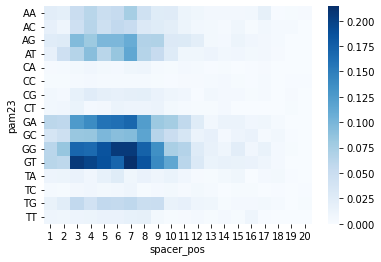

In [14]:
pos_by_pam = be.pl.editing_patterns.plot_by_pos_pam(cdata_bulk, cedit_rates_df_ct)
plt.savefig("1b_pos_by_pam_LDLRCDS.pdf", bbox_inches = 'tight')

In [15]:
pos_by_pam.to_csv("d_pos_by_pam_CasNG.csv")

## Context preference logo


In [16]:
def info_content(v, background = 0.25):
    v=v/v.sum()
    print(v)
    """Get information content-normalized v for 1d np.ndarry v"""
    return ((v*np.log2(v/background)).sum())*v

In [17]:
cedit_rates_df_ct_window = cedit_rates_df_ct.loc[(cedit_rates_df_ct.spacer_pos >= 3) & (cedit_rates_df_ct.spacer_pos <= 8)].copy()
cedit_rates_df_ct_window["context"] = cedit_rates_df_ct_window.apply(
    lambda row: cdata_bulk.guides.loc[row.guide, "Reporter"][
        row.rel_pos - 1 : row.rel_pos + 2
    ],
    axis=1,
)

In [18]:
con_mean_er = {}
for i in range(3):
    cedit_rates_df_ct_window[f"context_{i}"] = cedit_rates_df_ct_window.context.map(lambda s: s[i])
    con_mean_er[i] = cedit_rates_df_ct_window.groupby(f"context_{i}")["rep_mean"].mean()

In [19]:
con_mean_er

{0: context_0
 A    0.081038
 C    0.054649
 G    0.092795
 T    0.053692
 Name: rep_mean, dtype: float64,
 1: context_1
 C    0.069418
 Name: rep_mean, dtype: float64,
 2: context_2
 A    0.076824
 C    0.065948
 G    0.066806
 T    0.067506
 Name: rep_mean, dtype: float64}

In [20]:
bg = con_mean_er[1]["C"]
context_0 = info_content(con_mean_er[0], background = 0.25)
context_2 = info_content(con_mean_er[2], background = 0.25)

context_0
A    0.287190
C    0.193673
G    0.328858
T    0.190279
Name: rep_mean, dtype: float64
context_2
A    0.277261
C    0.238006
G    0.241103
T    0.243630
Name: rep_mean, dtype: float64


In [21]:
context_0

context_0
A    0.011853
C    0.007993
G    0.013572
T    0.007853
Name: rep_mean, dtype: float64

In [22]:
ic_tbl = pd.concat([con_mean_er[0]/con_mean_er[0].sum(), pd.DataFrame([0,1,0,0], index=["A", "C", "G", "T"]), con_mean_er[2]/con_mean_er[2].sum()], axis=1).T
ic_tbl.index = [-1, 0, 1]

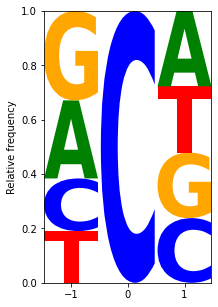

In [23]:
fig, ax = plt.subplots(figsize=(3,5))

logomaker.Logo(ic_tbl, ax = ax)
ax.set_ylabel("Relative frequency")
fig.savefig("context_preference_3_8.pdf")

In [24]:
ic_tbl.to_csv("c_context_CasNG.csv")